In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
import math
%load_ext cython


<br> 
# Pendulum Models
<br>


In [2]:
from rotary_pendulum import \
    RotaryPendulumNonLinearApproximation, RotaryPendulumLinearApproximation

import pyximport; pyximport.install()
from c_rotary_pedulum import CythonRotaryPendulumNonLinearApproximation

In [3]:
# Compare the simulation to real Quanser hardware (not a simulation)

# import os.path
# experimental_data_file = './quanser_trajectory_test.npy'
# experimental_data_generator = None

# if os.path.exists(experimental_data):
#     state_history = np.load(experimental_data_file)
# else:
#     class create_experimental_pendulum_results(object):
#         def __init__(self, total_samples=10000, filename=experimental_data_file):
#             pass

#         def next_state(self):
#             pass
        
#         def save(self):
#             pass
    

In [4]:
paper_nonlinear_approximated = RotaryPendulumNonLinearApproximation()
cython_paper_nonlinear_approximated = CythonRotaryPendulumNonLinearApproximation()
quanser_linear = RotaryPendulumLinearApproximation()

pendulums = {
    'paper_nonlinear_approximated': paper_nonlinear_approximated,
    # The Cython one is numerically unstable 
    #'cython_paper_nonlinear_approximated': cython_paper_nonlinear_approximated,
    'quanser_linear': quanser_linear
}
pendulum_models = pendulums.values()
pendulum_names = pendulums.keys()


<br><br>
# Visualize Trajectory
<br><br>


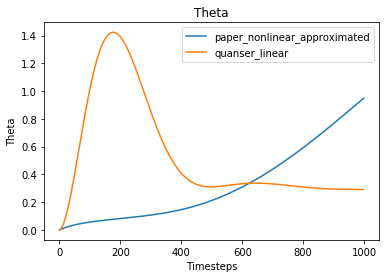

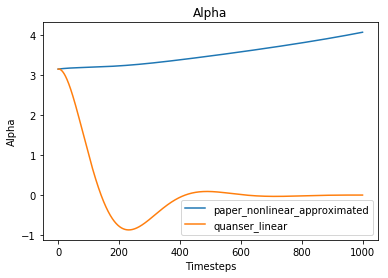

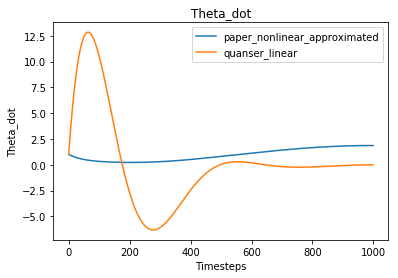

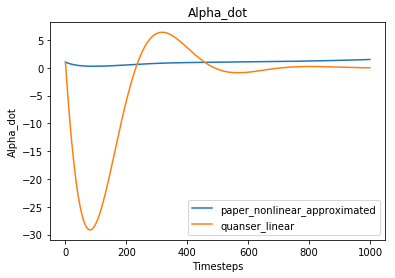

In [5]:
num_samples = 1000
num_models = len(pendulum_models)
states = np.zeros((num_samples, 4, num_models))
intitial_state = np.array([0, np.pi, 1, 1]) # theta, alpha, theta_dot, alpha_dot
time_step = 0.001 # 1kHz
action = 0.0 # 0.0V

# Run simulations
for j, pen in enumerate(pendulum_models):
    states[0, :, j] = intitial_state.copy()

state = intitial_state
for i in range(1, num_samples):
    for j, pen in enumerate(pendulum_models):
        states[i, :, j] = pen(states[i-1, :, j].copy(), action, time_step)

plt.plot(states[:,0,:])
plt.title('Theta'); plt.ylabel('Theta'); plt.xlabel('Timesteps'); plt.legend(pendulum_names)
plt.show()

plt.plot(states[:,1,:])
plt.title('Alpha'); plt.ylabel('Alpha'); plt.xlabel('Timesteps'); plt.legend(pendulum_names)
plt.show()

plt.plot(states[:,2,:])
plt.title('Theta_dot'); plt.ylabel('Theta_dot'); plt.xlabel('Timesteps'); plt.legend(pendulum_names)
plt.show()

plt.plot(states[:,3,:])
plt.title('Alpha_dot'); plt.ylabel('Alpha_dot'); plt.xlabel('Timesteps'); plt.legend(pendulum_names)
plt.show()
